Импорт необходимых библиотек:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import *
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Считываем файл:

In [ ]:
df = pd.read_excel('/content/Т9 Данные_Логит_модель_Скоринг_фермеры.xlsx')
df.head(3)

,Unnamed: 0,Регистрационный номер,Статус,Регион регистрации,Код ОКАТО,Вид деятельности/отрасль,ИДО,ИФР,Сводный индикатор,"Уставный капитал, RUB",...,"2017, Коэффициент быстрой ликвидности, %","2018, Коэффициент быстрой ликвидности, %","2019, Коэффициент быстрой ликвидности, %","2020, Коэффициент быстрой ликвидности, %","2017, Коэффициент абсолютной ликвидности, %","2018, Коэффициент абсолютной ликвидности, %","2019, Коэффициент абсолютной ликвидности, %","2020, Коэффициент абсолютной ликвидности, %",Отрасль,Округ
0,0,1020100510198,0,Адыгея (Республика) (Адыгея),79205000007,"Выращивание зерновых (кроме риса), зернобобовы...",1.0,6.0,Низкий риск,36076000.0,...,1.0246,0.8768,1.4678,7.3216,0.3789,0.4929,0.8792,5.8614,Растениеводство,Южный ФО
1,1,1020100511265,0,Адыгея (Республика) (Адыгея),79240000004,Выращивание однолетних культур,2.0,6.0,Низкий риск,300000.0,...,3.4128,19.9143,12.3069,16.1235,2.4966,17.7786,10.1287,13.8741,Растениеводство,Южный ФО
2,2,1020100698265,0,Адыгея (Республика) (Адыгея),79222000024,Выращивание однолетних кормовых культур,23.0,NaN,Низкий риск,NaN,...,NaN,0.2093,NaN,NaN,NaN,0.2093,NaN,NaN,Растениеводство,Южный ФО


По смыслу были выбраны 10 факторов. Выбор обусловлен их финансовой значимостью и их способностью отражать ключевые аспекты деятельности фермы.

Все данные относятся к одному временному периоду, что упрощает сравнение и анализ, выбран 2020 год для наиболее актуальных предсказаний.

In [ ]:
y = df['Статус']
X = df[['Регистрационный номер', 'Регион регистрации', 'Вид деятельности/отрасль', 'Сводный индикатор', '2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %', '2020, Активы  всего, RUB', '2020, Выручка, RUB', '2020, Коэффициент текущей ликвидности, %', 'Отрасль', 'Округ']]
X.head(3)

,Регистрационный номер,Регион регистрации,Вид деятельности/отрасль,Сводный индикатор,"2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %","2020, Активы всего, RUB","2020, Выручка, RUB","2020, Коэффициент текущей ликвидности, %",Отрасль,Округ
0,1020100510198,Адыгея (Республика) (Адыгея),"Выращивание зерновых (кроме риса), зернобобовы...",Низкий риск,0.1958,642396000.0,440810000.0,23.0369,Растениеводство,Южный ФО
1,1020100511265,Адыгея (Республика) (Адыгея),Выращивание однолетних культур,Низкий риск,0.4096,45765000.0,59501000.0,21.3267,Растениеводство,Южный ФО
2,1020100698265,Адыгея (Республика) (Адыгея),Выращивание однолетних кормовых культур,Низкий риск,0.1685,4551000.0,5463000.0,NaN,Растениеводство,Южный ФО


In [ ]:
# Выполняем кодирование категориальных признаков в числовые значения
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['Регион регистрации'] = label_encoder.fit_transform(X['Регион регистрации'])
X['Вид деятельности/отрасль'] = label_encoder.fit_transform(X['Вид деятельности/отрасль'])
X['Сводный индикатор'] = label_encoder.fit_transform(X['Сводный индикатор'])
X['Отрасль'] = label_encoder.fit_transform(X['Отрасль'])
X['Округ'] = label_encoder.fit_transform(X['Округ'])

X.head(4)

,Регистрационный номер,Регион регистрации,Вид деятельности/отрасль,Сводный индикатор,"2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %","2020, Активы всего, RUB","2020, Выручка, RUB","2020, Коэффициент текущей ликвидности, %",Отрасль,Округ
0,1020100510198,0,7,1,0.1958,642396000.0,440810000.0,23.0369,1,5
1,1020100511265,0,20,1,0.4096,45765000.0,59501000.0,21.3267,1,5
2,1020100698265,0,19,1,0.1685,4551000.0,5463000.0,NaN,1,5
3,1020100704788,0,8,3,NaN,46432000.0,50667000.0,7.6267,1,5


In [ ]:
# Считаем количество пропущенных значений по столбцам
y_not = y.isnull().sum()
X_not = X.isnull().sum()
y_not, X_not

(0,
 Регистрационный номер                                        0
 Регион регистрации                                           0
 Вид деятельности/отрасль                                     0
 Сводный индикатор                                            0
 2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %    957
 2020, Активы  всего, RUB                                    11
 2020, Выручка, RUB                                          11
 2020, Коэффициент текущей ликвидности, %                   313
 Отрасль                                                      0
 Округ                                                        0
 dtype: int64)

Заполняем пропущенные значения в данных, используя информацию из существующих данных и предполагая, что "похожие" строки могут предоставить адекватные заменители для пропущенных значений.

In [ ]:
# Меняем пропущенные значения на NaN
X.replace('', np.nan, inplace=True)

# Выбираем числовые столбцы
columns = X.select_dtypes(include=np.number).columns

# Заполнение пропущенных значений с использованием средних значений из подходящих строк
for index, row in X.iterrows():
    if row.isnull().any():
        # Создаем фильтр, чтобы исключить текущую строку и строки с пропущенными значениями
        filter_condition = (X.index != index) & (~X[columns].isnull().any(axis=1))
        similar_rows = X[filter_condition]

        # Вычисляем среднее значение для каждого столбца из подходящих строк
        mean = similar_rows[columns].mean()

        # Заполняем пропущенные значения в текущей строке значениями средних значений
        X.loc[index, row.isnull()] = mean[row.isnull()]

# Выводим результат
X.head(5)

,Регистрационный номер,Регион регистрации,Вид деятельности/отрасль,Сводный индикатор,"2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %","2020, Активы всего, RUB","2020, Выручка, RUB","2020, Коэффициент текущей ликвидности, %",Отрасль,Округ
0,1020100510198,0,7,1,0.195800,642396000.0,440810000.0,23.036900,1,5
1,1020100511265,0,20,1,0.409600,45765000.0,59501000.0,21.326700,1,5
2,1020100698265,0,19,1,0.168500,4551000.0,5463000.0,39.351087,1,5
3,1020100704788,0,8,3,0.032133,46432000.0,50667000.0,7.626700,1,5
4,1020100707681,0,8,1,0.276800,50595000.0,39747000.0,6.326600,1,5


Проводим стандартизацию данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)

# Преобразование в датафрейм
X_new = pd.DataFrame(X_new, columns=X.columns)

Построим тепловую карту корреляционной матрицы:

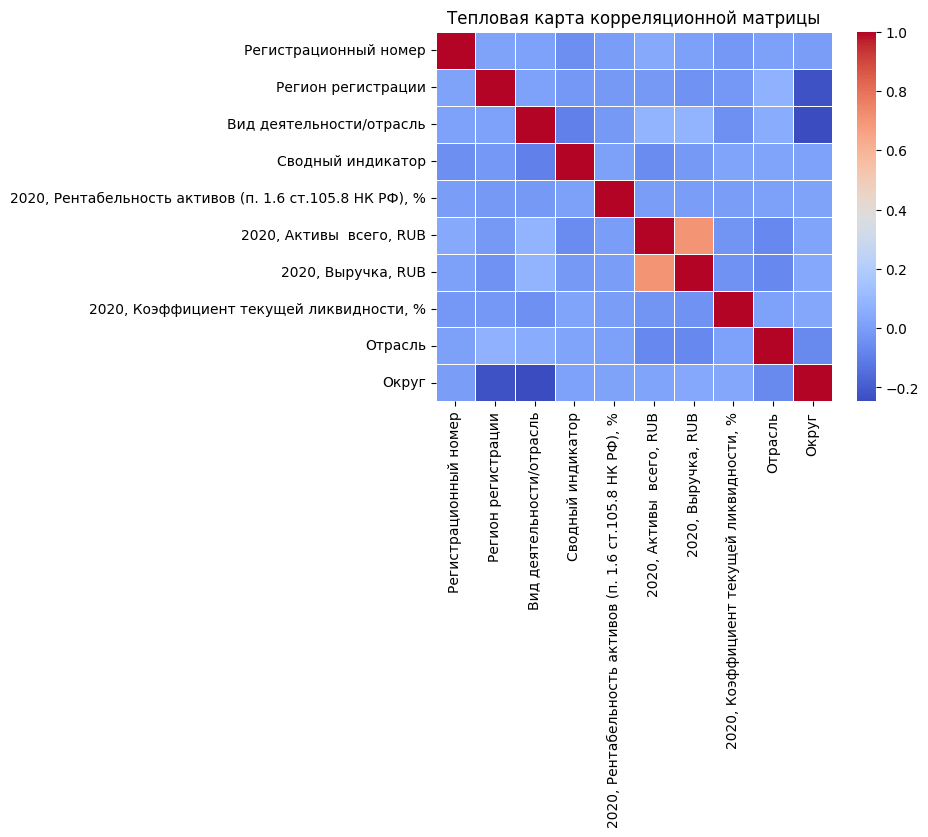

In [ ]:
correlation_matrix = X_new.corr() # создаем матрицу
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) # строим тепловую карту
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

Нет сильно коррелируемые факторы (коэффициент корреляции больше 0.8).

**Построение моделей**

Строим логит модель.

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X_new) # добавляем константу
logit_model = sm.Logit(y, X) # создаем модель логистической регрессии
logit_results = logit_model.fit(disp=False) # обучаем
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                 Статус   No. Observations:                 8673
Model:                          Logit   Df Residuals:                     8662
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.4049
Time:                        15:06:30   Log-Likelihood:                -756.13
converged:                       True   LL-Null:                       -1270.5
Covariance Type:            nonrobust   LLR p-value:                1.154e-214
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -3.2626      5.728     -0.570      0.569     -14.488       7.

Проверяем t-статистику:

In [ ]:
n = len(X)
p = X.shape[1]
naz = X.columns.to_list()
t_values = logit_results.tvalues # t значения
table = t.ppf(0.95, n-p-1) # табличное
print(f"t-табличное: {table}")

# таблица с результатами
t_test_results = pd.DataFrame({
    'Параметр': naz,
    't > t-табличное': np.abs(t_values) > table})

print(t_test_results.to_string(index=False))

t-табличное: 1.6450295804369206
                                               Параметр  t > t-табличное
                                                  const            False
                                  Регистрационный номер            False
                                     Регион регистрации            False
                               Вид деятельности/отрасль            False
                                      Сводный индикатор             True
2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %            False
                               2020, Активы  всего, RUB            False
                                     2020, Выручка, RUB             True
               2020, Коэффициент текущей ликвидности, %            False
                                                Отрасль             True
                                                  Округ            False


Выделяем значимые параметры

In [ ]:
parameters = t_test_results.loc[t_test_results['t > t-табличное'], 'Параметр'].tolist()

print("Значемые параметры")
print(parameters)

Значемые параметры
['const', 'Сводный индикатор', '2020, Выручка, RUB', 'Отрасль']


Строим пробит модель.

In [ ]:
probit_model = sm.Probit(y, X) # создаем пробит модель
probit_results = probit_model.fit(disp=False) # обучаем
print(probit_results.summary())

                          Probit Regression Results                           
Dep. Variable:                 Статус   No. Observations:                 8673
Model:                         Probit   Df Residuals:                     8662
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.3711
Time:                        15:06:46   Log-Likelihood:                -799.03
converged:                       True   LL-Null:                       -1270.5
Covariance Type:            nonrobust   LLR p-value:                3.501e-196
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -1.0884      4.287     -0.254      0.800      -9.490       7.

Проверяем t-статистику:

In [ ]:
t_values = probit_results.tvalues # t значения
table = t.ppf(0.95, n-p-1) # табличное
print(f"t-табличное: {table}")

# таблица с результатами
t_test_results = pd.DataFrame({
    'Параметр': naz,
    't > t-табличное': np.abs(t_values) > table})

print(t_test_results.to_string(index=False))

t-табличное: 1.6450295804369206
                                               Параметр  t > t-табличное
                                                  const             True
                                  Регистрационный номер            False
                                     Регион регистрации            False
                               Вид деятельности/отрасль            False
                                      Сводный индикатор             True
2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %            False
                               2020, Активы  всего, RUB             True
                                     2020, Выручка, RUB             True
               2020, Коэффициент текущей ликвидности, %             True
                                                Отрасль             True
                                                  Округ            False


Выделяем значимые параметры

In [ ]:
parameters = t_test_results.loc[t_test_results['t > t-табличное'], 'Параметр'].tolist()

print("Значемые параметры")
print(parameters)

Значемые параметры
['const', 'Сводный индикатор', '2020, Активы  всего, RUB', '2020, Выручка, RUB', '2020, Коэффициент текущей ликвидности, %', 'Отрасль']


Модели получились примерно одинаковыми по качеству, у них примерно одинаковый R^2 (0.4 и 0.37), и примерно одинаковое количество значимых факторов (4 и 6).